In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
dataset = pd.read_csv('movie_metadata.csv')
dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [321]:
dataset.shape

(5043, 28)

In [322]:
dataset.drop_duplicates(inplace=True)

In [323]:
dataset.shape

(4998, 28)

In [324]:
dataset.describe(include='O')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,4979,4895,4985,4998,4991,4998,4975,4846,4998,4986,4993,4697
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,King Kong,Steve Coogan,based on novel,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,4772,26,20,235,49,3,8,4,3,4662,3773,2098


In [325]:
dataset.drop(["director_name", "actor_2_name","actor_1_name","movie_title","actor_3_name","plot_keywords","movie_imdb_link"], axis = 1, inplace = True)

In [326]:
nandata=dataset.isnull().sum()
nandata

color                         19
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        874
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [327]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


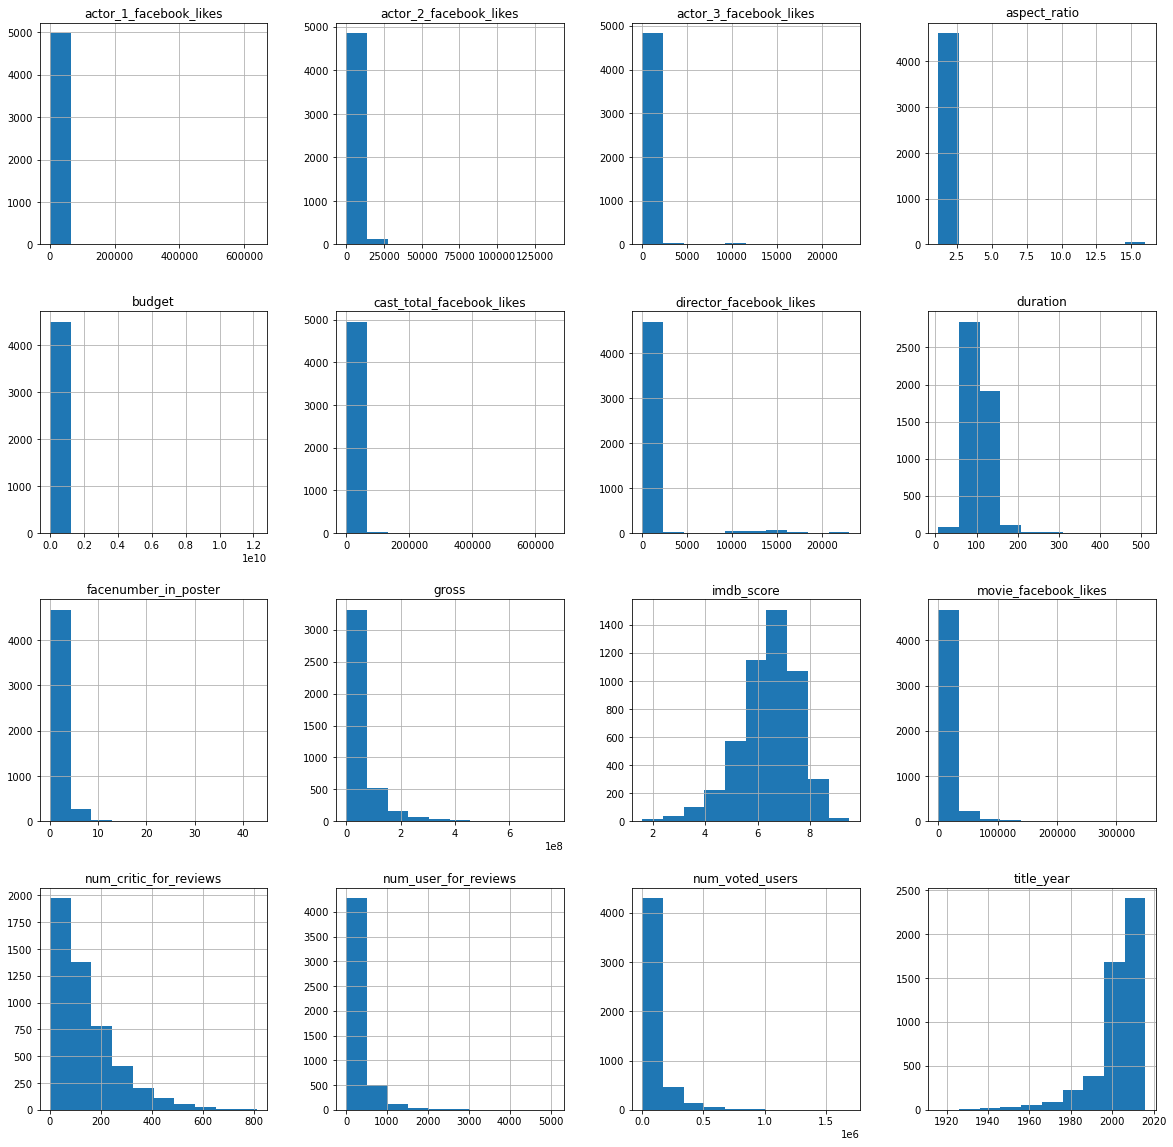

In [328]:
dataset.hist(figsize=[20,20])
plt.show()

In [329]:
dataset.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [330]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(dataset[['num_critic_for_reviews','director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross','num_voted_users',
       'cast_total_facebook_likes','num_user_for_reviews','budget','actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']])
dataset[['num_critic_for_reviews','director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross','num_voted_users',
       'cast_total_facebook_likes','num_user_for_reviews','budget','actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']] = imputer.transform(dataset[['num_critic_for_reviews','director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross','num_voted_users',
       'cast_total_facebook_likes','num_user_for_reviews','budget','actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']])

In [331]:
nandata=dataset.isnull().sum()
nandata

color                         19
num_critic_for_reviews         0
duration                      15
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                          0
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews           0
language                      12
country                        5
content_rating               301
budget                         0
title_year                   107
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [332]:
dataset

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204.0,4834.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220.0,48350.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868.0,11700.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337.0,106759.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,110.0,NaN,131.0,369.0,131.0,25445749.0,Documentary,8.0,143.0,...,156.0,NaN,NaN,NaN,20000000.0,NaN,12.0,7.1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,1.0,87.0,2.0,318.0,637.0,25445749.0,Comedy|Drama,629.0,2283.0,...,6.0,English,Canada,NaN,20000000.0,2013.0,470.0,7.7,NaN,84.0
5039,Color,43.0,43.0,49.0,319.0,841.0,25445749.0,Crime|Drama|Mystery|Thriller,73839.0,1753.0,...,359.0,English,USA,TV-14,20000000.0,NaN,593.0,7.5,16.00,32000.0
5040,Color,13.0,76.0,0.0,0.0,0.0,25445749.0,Drama|Horror|Thriller,38.0,0.0,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16.0
5041,Color,14.0,100.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,1255.0,2386.0,...,9.0,English,USA,PG-13,20000000.0,2012.0,719.0,6.3,2.35,660.0


In [333]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(dataset[['color','language','country','content_rating']])
dataset[['color','language','country','content_rating']] = imputer.transform(dataset[['color','language','country','content_rating']])

In [334]:
nandata=dataset.isnull().sum()
nandata

color                          0
num_critic_for_reviews         0
duration                      15
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                          0
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                   107
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [335]:
dataset['genres']=dataset.genres.str.split('|')

In [336]:
dataset

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",886204.0,4834.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,"[Action, Adventure, Fantasy]",471220.0,48350.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,"[Action, Adventure, Thriller]",275868.0,11700.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,"[Action, Thriller]",1144337.0,106759.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,Color,110.0,NaN,131.0,369.0,131.0,25445749.0,[Documentary],8.0,143.0,...,156.0,English,USA,R,20000000.0,NaN,12.0,7.1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,1.0,87.0,2.0,318.0,637.0,25445749.0,"[Comedy, Drama]",629.0,2283.0,...,6.0,English,Canada,R,20000000.0,2013.0,470.0,7.7,NaN,84.0
5039,Color,43.0,43.0,49.0,319.0,841.0,25445749.0,"[Crime, Drama, Mystery, Thriller]",73839.0,1753.0,...,359.0,English,USA,TV-14,20000000.0,NaN,593.0,7.5,16.00,32000.0
5040,Color,13.0,76.0,0.0,0.0,0.0,25445749.0,"[Drama, Horror, Thriller]",38.0,0.0,...,3.0,English,USA,R,1400.0,2013.0,0.0,6.3,NaN,16.0
5041,Color,14.0,100.0,0.0,489.0,946.0,10443.0,"[Comedy, Drama, Romance]",1255.0,2386.0,...,9.0,English,USA,PG-13,20000000.0,2012.0,719.0,6.3,2.35,660.0


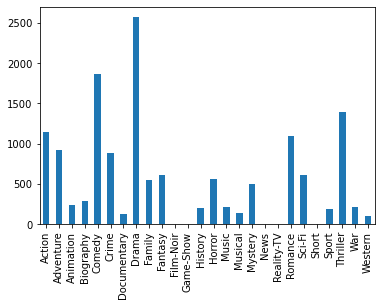

In [337]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform(dataset.genres.values), dataset.index, mlb.classes_)
df.sum().plot(kind='bar');

In [338]:
for column in dataset.columns :
  if dataset[column].dtype == 'object':
    print(dataset[column].value_counts())

Color               4791
 Black and White     207
Name: color, dtype: int64
[Drama]                                                    235
[Comedy]                                                   205
[Comedy, Drama]                                            189
[Comedy, Drama, Romance]                                   187
[Comedy, Romance]                                          158
                                                          ... 
[Action, Comedy, Mystery, Romance]                           1
[Comedy, Crime, Musical, Mystery]                            1
[Action, Adventure, History, Romance]                        1
[Comedy, Music, Sci-Fi]                                      1
[Action, Adventure, Animation, Comedy, Fantasy, Sci-Fi]      1
Name: genres, Length: 914, dtype: int64
English       4674
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Italian         11
Russian         11
P

In [339]:
for value in dataset.country :
  if value =='USA' or value == 'UK':
    continue
  dataset.country.replace(value,'Other Country',inplace=True)

In [340]:
for value in dataset.language :
  if value =='English':
    continue
  dataset.language.replace(value,'Other Language',inplace=True)

In [341]:
for value in dataset.content_rating :
  if value =='R' or value == 'PG-13' or value == 'PG':
    continue
  dataset.content_rating.replace(value,'Other Rating',inplace=True)

In [342]:
dataset=dataset.join(df[['Action', 'Animation', 'Comedy','Drama','Thriller','Romance']])

In [343]:
dataset

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Animation,Comedy,Drama,Thriller,Romance
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",886204.0,4834.0,...,936.0,7.9,1.78,33000.0,1,0,0,0,0,0
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,"[Action, Adventure, Fantasy]",471220.0,48350.0,...,5000.0,7.1,2.35,0.0,1,0,0,0,0,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,"[Action, Adventure, Thriller]",275868.0,11700.0,...,393.0,6.8,2.35,85000.0,1,0,0,0,1,0
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,"[Action, Thriller]",1144337.0,106759.0,...,23000.0,8.5,2.35,164000.0,1,0,0,0,1,0
4,Color,110.0,NaN,131.0,369.0,131.0,25445749.0,[Documentary],8.0,143.0,...,12.0,7.1,NaN,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,1.0,87.0,2.0,318.0,637.0,25445749.0,"[Comedy, Drama]",629.0,2283.0,...,470.0,7.7,NaN,84.0,0,0,1,1,0,0
5039,Color,43.0,43.0,49.0,319.0,841.0,25445749.0,"[Crime, Drama, Mystery, Thriller]",73839.0,1753.0,...,593.0,7.5,16.00,32000.0,0,0,0,1,1,0
5040,Color,13.0,76.0,0.0,0.0,0.0,25445749.0,"[Drama, Horror, Thriller]",38.0,0.0,...,0.0,6.3,NaN,16.0,0,0,0,1,1,0
5041,Color,14.0,100.0,0.0,489.0,946.0,10443.0,"[Comedy, Drama, Romance]",1255.0,2386.0,...,719.0,6.3,2.35,660.0,0,0,1,1,0,1


In [344]:
dataset.drop(["genres"],axis= 1,inplace=True)

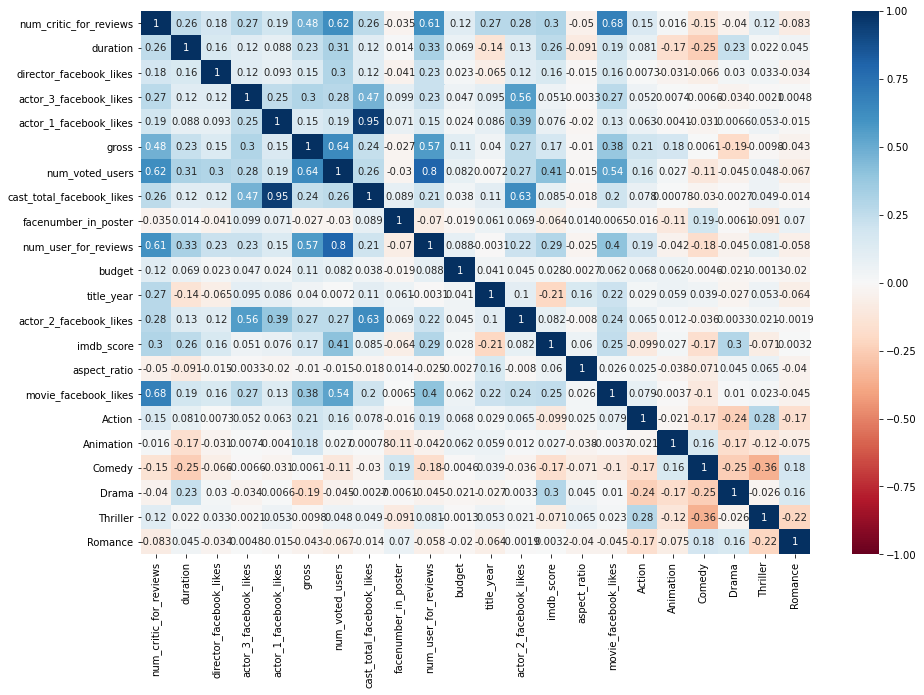

In [345]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(method='pearson'),cmap="RdBu", annot=True,ax=ax, vmin=-1, vmax=1, center=0);

In [346]:
dataset.drop(["cast_total_facebook_likes"], axis=1, inplace=True)

In [347]:
dataset

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Animation,Comedy,Drama,Thriller,Romance
0,Color,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,0.0,3054.0,...,936.0,7.9,1.78,33000.0,1,0,0,0,0,0
1,Color,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,0.0,1238.0,...,5000.0,7.1,2.35,0.0,1,0,0,0,0,0
2,Color,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,1.0,994.0,...,393.0,6.8,2.35,85000.0,1,0,0,0,1,0
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,0.0,2701.0,...,23000.0,8.5,2.35,164000.0,1,0,0,0,1,0
4,Color,110.0,NaN,131.0,369.0,131.0,25445749.0,8.0,0.0,156.0,...,12.0,7.1,NaN,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,1.0,87.0,2.0,318.0,637.0,25445749.0,629.0,2.0,6.0,...,470.0,7.7,NaN,84.0,0,0,1,1,0,0
5039,Color,43.0,43.0,49.0,319.0,841.0,25445749.0,73839.0,1.0,359.0,...,593.0,7.5,16.00,32000.0,0,0,0,1,1,0
5040,Color,13.0,76.0,0.0,0.0,0.0,25445749.0,38.0,0.0,3.0,...,0.0,6.3,NaN,16.0,0,0,0,1,1,0
5041,Color,14.0,100.0,0.0,489.0,946.0,10443.0,1255.0,5.0,9.0,...,719.0,6.3,2.35,660.0,0,0,1,1,0,1


In [348]:
from sklearn.preprocessing import OneHotEncoder

In [349]:
enc = OneHotEncoder()

In [350]:
dataset_encoded = enc.fit_transform(dataset[['color','language','country','content_rating']])

In [351]:
dataset_encoded

<4998x11 sparse matrix of type '<class 'numpy.float64'>'
	with 19992 stored elements in Compressed Sparse Row format>

In [352]:
dataset_encoded = pd.DataFrame(dataset_encoded.toarray())

In [353]:
dataset_encoded

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4994,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4995,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4996,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [354]:
dataset_encoded.columns=enc.get_feature_names(['color','language','country','content_rating'])

In [355]:
dataset_encoded

,color_ Black and White,color_Color,language_English,language_Other Language,country_Other Country,country_UK,country_USA,content_rating_Other Rating,content_rating_PG,content_rating_PG-13,content_rating_R
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4994,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4995,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4996,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [356]:
dataset_encoded.drop(['color_ Black and White','language_Other Language','country_Other Country','content_rating_R'], axis = 1, inplace = True)

In [357]:
dataset_encoded

,color_Color,language_English,country_UK,country_USA,content_rating_Other Rating,content_rating_PG,content_rating_PG-13
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4993,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4994,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4995,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4996,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [358]:
dataset = pd.concat([dataset, dataset_encoded], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   color                        4998 non-null   object 
 1   num_critic_for_reviews       4998 non-null   float64
 2   duration                     4983 non-null   float64
 3   director_facebook_likes      4998 non-null   float64
 4   actor_3_facebook_likes       4998 non-null   float64
 5   actor_1_facebook_likes       4998 non-null   float64
 6   gross                        4998 non-null   float64
 7   num_voted_users              4998 non-null   float64
 8   facenumber_in_poster         4985 non-null   float64
 9   num_user_for_reviews         4998 non-null   float64
 10  language                     4998 non-null   object 
 11  country                      4998 non-null   object 
 12  content_rating               4998 non-null   object 
 13  budget            

In [359]:
dataset.drop(['color', 'language', 'country', 'content_rating'], axis = 1, inplace = True)

In [360]:
dataset

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,...,Drama,Thriller,Romance,color_Color,language_English,country_UK,country_USA,content_rating_Other Rating,content_rating_PG,content_rating_PG-13
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,0.0,3054.0,237000000.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,0.0,1238.0,300000000.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,1.0,994.0,245000000.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,0.0,2701.0,250000000.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,110.0,NaN,131.0,369.0,131.0,25445749.0,8.0,0.0,156.0,20000000.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,25445749.0,629.0,2.0,6.0,20000000.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5039,43.0,43.0,49.0,319.0,841.0,25445749.0,73839.0,1.0,359.0,20000000.0,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,13.0,76.0,0.0,0.0,0.0,25445749.0,38.0,0.0,3.0,1400.0,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255.0,5.0,9.0,20000000.0,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
nandata=dataset.isnull().sum()
nandata

num_critic_for_reviews          45
duration                        60
director_facebook_likes         45
actor_3_facebook_likes          45
actor_1_facebook_likes          45
gross                           45
num_voted_users                 45
facenumber_in_poster            58
num_user_for_reviews            45
budget                          45
title_year                     152
actor_2_facebook_likes          45
imdb_score                      45
aspect_ratio                   372
movie_facebook_likes            45
Action                          45
Animation                       45
Comedy                          45
Drama                           45
Thriller                        45
Romance                         45
color_Color                     45
language_English                45
country_UK                      45
country_USA                     45
content_rating_Other Rating     45
content_rating_PG               45
content_rating_PG-13            45
dtype: int64

In [362]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(dataset[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','num_user_for_reviews','budget','title_year','actor_2_facebook_likes','imdb_score','movie_facebook_likes','facenumber_in_poster', 'duration', 'aspect_ratio','Action', 'Animation', 'Comedy','Drama','Thriller','Romance','color_Color','language_English','country_UK','country_USA','content_rating_Other Rating','content_rating_PG','content_rating_PG-13']])
dataset[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','num_user_for_reviews','budget','title_year','actor_2_facebook_likes','imdb_score','movie_facebook_likes','facenumber_in_poster', 'duration', 'aspect_ratio','Action', 'Animation', 'Comedy','Drama','Thriller','Romance','color_Color','language_English','country_UK','country_USA','content_rating_Other Rating','content_rating_PG','content_rating_PG-13']] = imputer.transform(dataset[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','num_user_for_reviews','budget','title_year','actor_2_facebook_likes','imdb_score','movie_facebook_likes','facenumber_in_poster', 'duration', 'aspect_ratio','Action', 'Animation', 'Comedy','Drama','Thriller','Romance','color_Color','language_English','country_UK','country_USA','content_rating_Other Rating','content_rating_PG','content_rating_PG-13']])

In [363]:
from sklearn.preprocessing import StandardScaler

In [364]:
sc = StandardScaler()
dataset[['num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 'budget',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'duration', 'facenumber_in_poster','title_year','color_Color','language_English','country_UK','country_USA','content_rating_Other Rating','content_rating_PG','content_rating_PG-13']] = sc.fit_transform(dataset[['num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users', 'num_user_for_reviews', 'budget',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'duration', 'facenumber_in_poster','title_year','color_Color','language_English','country_UK','country_USA','content_rating_Other Rating','content_rating_PG','content_rating_PG-13']])

In [365]:
dataset

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,...,Drama,Thriller,Romance,color_Color,language_English,country_UK,country_USA,content_rating_Other Rating,content_rating_PG,content_rating_PG-13
0,4.847901,2.821050,-0.240656,0.130551,-0.366818,11.538217,5.835881,-0.673847,7.402797,1.017951,...,0.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,1.578728
1,1.351102,2.463409,-0.038273,0.219373,2.234438,4.272339,2.821739,-0.673847,2.575499,1.339675,...,0.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,1.578728
2,3.842883,1.628914,-0.240656,-0.294571,0.300170,2.511365,1.402844,-0.175868,1.926897,1.058805,...,0.0,1.0,0.0,0.206891,0.262028,3.222382,-1.770200,-0.315676,-0.400805,1.578728
3,5.595435,2.264720,7.667749,13.695858,1.367353,6.506802,7.710771,-0.673847,6.464451,1.084339,...,0.0,1.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,1.578728
4,-0.243637,-0.675883,-0.193565,-0.167157,-0.424780,-0.301368,-0.600803,-0.673847,-0.300678,-0.090208,...,0.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,-1.148984,-0.795096,-0.239937,-0.198398,-0.391030,-0.301368,-0.596292,0.322112,-0.699409,-0.090208,...,1.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
5039,-0.800135,-2.543563,-0.223042,-0.197785,-0.377424,-0.301368,-0.064548,-0.175868,0.238937,-0.090208,...,1.0,1.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
5040,-1.049313,-1.232213,-0.240656,-0.393194,-0.433517,-0.301368,-0.600585,-0.673847,-0.707383,-0.192336,...,1.0,1.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
5041,-1.041007,-0.278504,-0.240656,-0.093648,-0.370420,-0.711054,-0.591745,1.816050,-0.691434,-0.090208,...,1.0,0.0,1.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421


In [366]:
nandata=dataset.isnull().sum()
nandata

num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_1_facebook_likes         0
gross                          0
num_voted_users                0
facenumber_in_poster           0
num_user_for_reviews           0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
Action                         0
Animation                      0
Comedy                         0
Drama                          0
Thriller                       0
Romance                        0
color_Color                    0
language_English               0
country_UK                     0
country_USA                    0
content_rating_Other Rating    0
content_rating_PG              0
content_rating_PG-13           0
dtype: int64

In [367]:
X = dataset.iloc[: , dataset.columns != 'imdb_score']
X

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,...,Drama,Thriller,Romance,color_Color,language_English,country_UK,country_USA,content_rating_Other Rating,content_rating_PG,content_rating_PG-13
0,4.847901,2.821050,-0.240656,0.130551,-0.366818,11.538217,5.835881,-0.673847,7.402797,1.017951,...,0.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,1.578728
1,1.351102,2.463409,-0.038273,0.219373,2.234438,4.272339,2.821739,-0.673847,2.575499,1.339675,...,0.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,1.578728
2,3.842883,1.628914,-0.240656,-0.294571,0.300170,2.511365,1.402844,-0.175868,1.926897,1.058805,...,0.0,1.0,0.0,0.206891,0.262028,3.222382,-1.770200,-0.315676,-0.400805,1.578728
3,5.595435,2.264720,7.667749,13.695858,1.367353,6.506802,7.710771,-0.673847,6.464451,1.084339,...,0.0,1.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,1.578728
4,-0.243637,-0.675883,-0.193565,-0.167157,-0.424780,-0.301368,-0.600803,-0.673847,-0.300678,-0.090208,...,0.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,-1.148984,-0.795096,-0.239937,-0.198398,-0.391030,-0.301368,-0.596292,0.322112,-0.699409,-0.090208,...,1.0,0.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
5039,-0.800135,-2.543563,-0.223042,-0.197785,-0.377424,-0.301368,-0.064548,-0.175868,0.238937,-0.090208,...,1.0,1.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
5040,-1.049313,-1.232213,-0.240656,-0.393194,-0.433517,-0.301368,-0.600585,-0.673847,-0.707383,-0.192336,...,1.0,1.0,0.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421
5041,-1.041007,-0.278504,-0.240656,-0.093648,-0.370420,-0.711054,-0.591745,1.816050,-0.691434,-0.090208,...,1.0,0.0,1.0,0.206891,0.262028,-0.310329,0.564908,-0.315676,-0.400805,-0.633421


In [368]:
y = dataset.loc[: ,'imdb_score']
y

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
5038    7.7
5039    7.5
5040    6.3
5041    6.3
5042    6.6
Name: imdb_score, Length: 5043, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [58]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train, y_train)
regressor_svr_score_train = regressor_svr.score(X_train, y_train)
print("Training score: ",regressor_svr_score_train)
regressor_svr_score_test = regressor_svr.score(X_test, y_test)
print("Testing score: ",regressor_svr_score_test)

Training score:  0.5158412050637915
Testing score:  0.49447764714970355


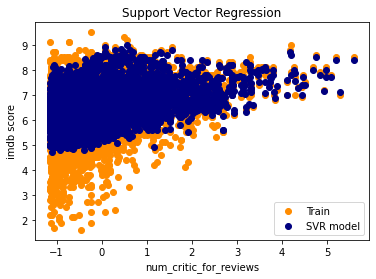

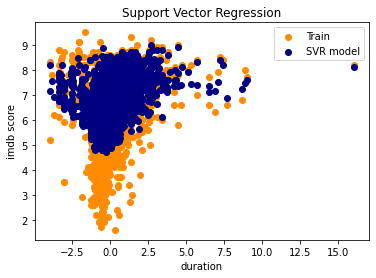

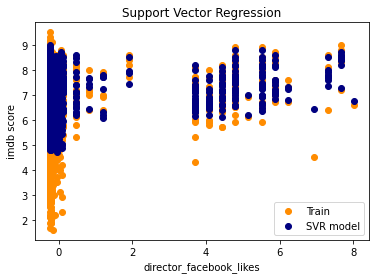

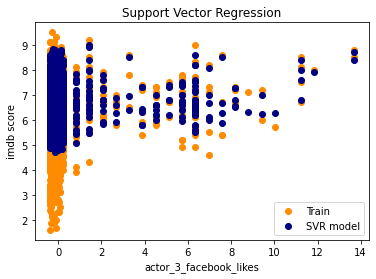

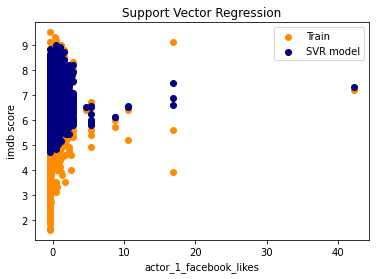

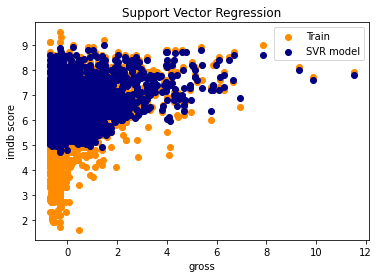

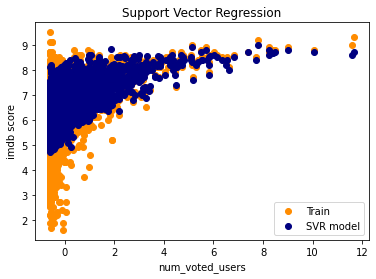

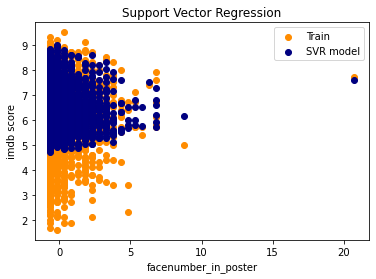

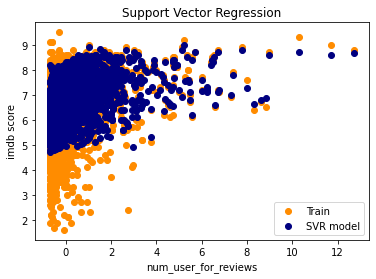

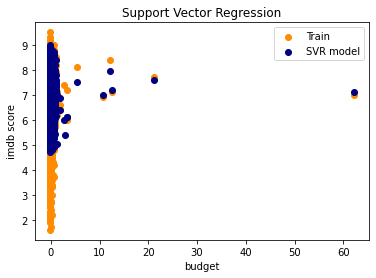

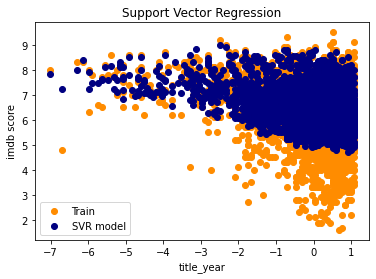

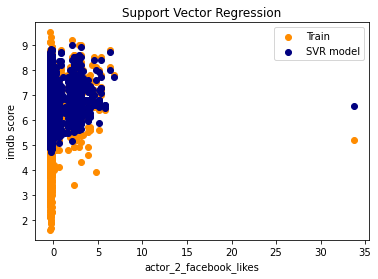

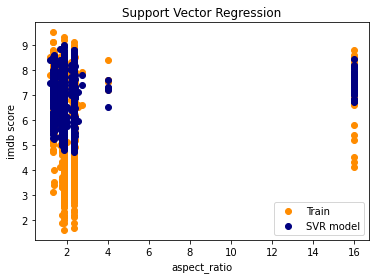

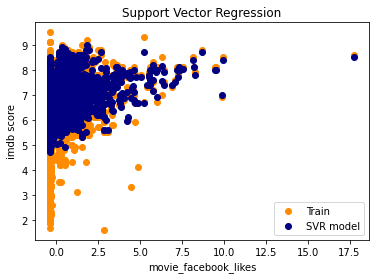

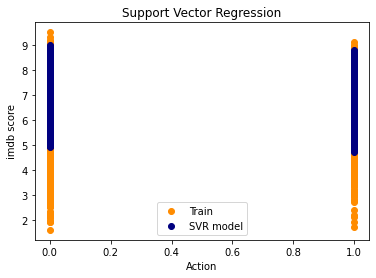

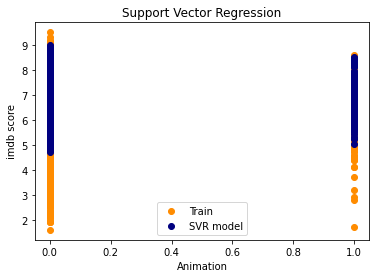

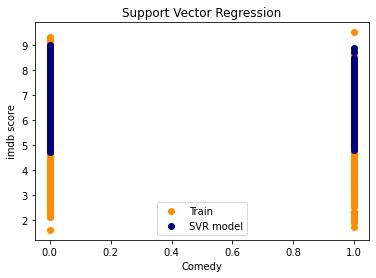

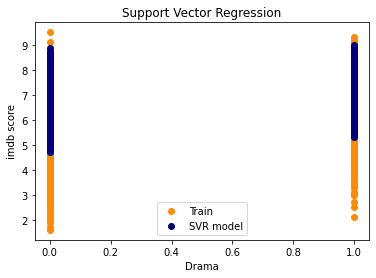

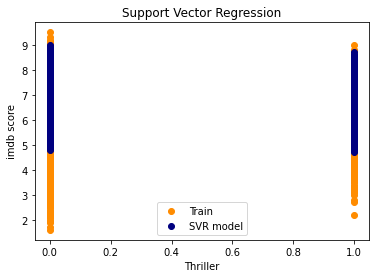

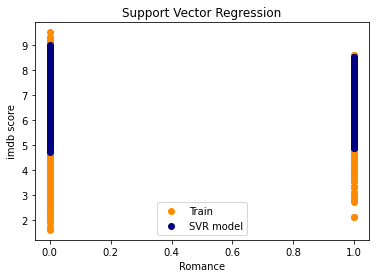

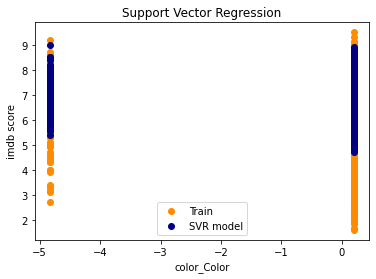

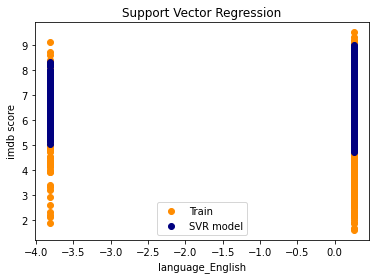

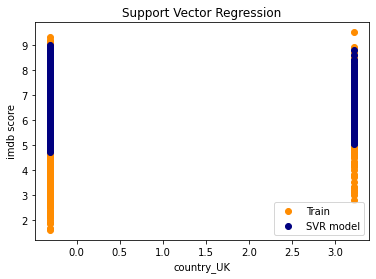

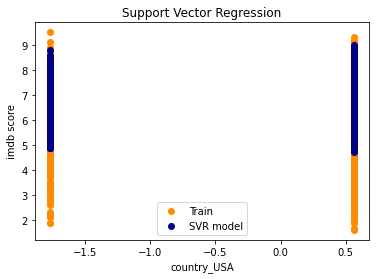

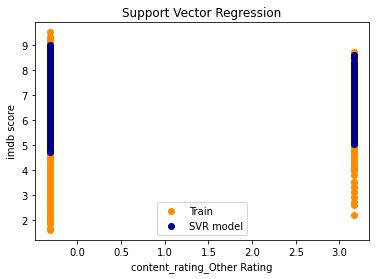

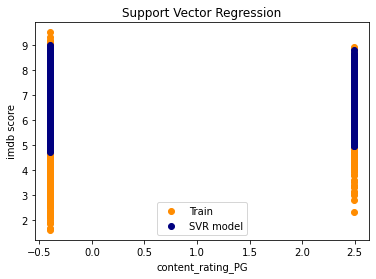

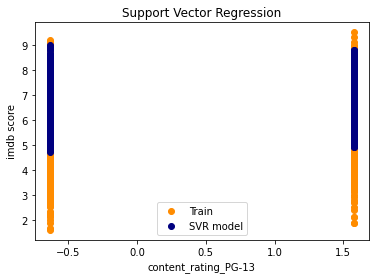

In [71]:
for col in X_train.columns:
    plt.scatter(X_train[col], y_train, color='darkorange', label='Train')
    plt.scatter(X_train[col], regressor_svr.predict(X_train), color='navy', label='SVR model')
    plt.xlabel(col)
    plt.ylabel('imdb score')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()


In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor_rf.fit(X_train, y_train)
regressor_rf_score_train = regressor_rf.score(X_train, y_train)
print("Training score: ",regressor_rf_score_train)
regressor_rf_score_test = regressor_rf.score(X_test, y_test)
print("Testing score: ",regressor_rf_score_test)

Training score:  0.9387573882680897
Testing score:  0.5657302394281475


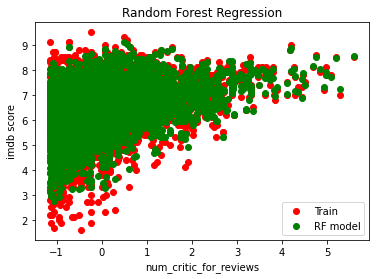

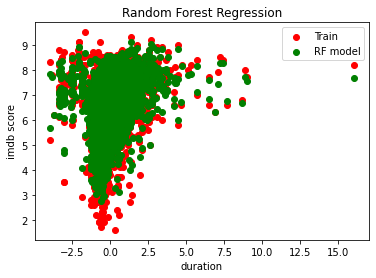

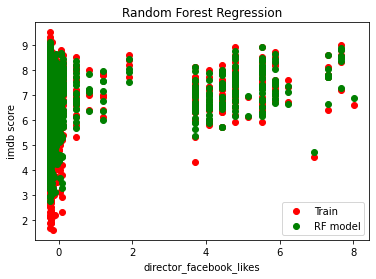

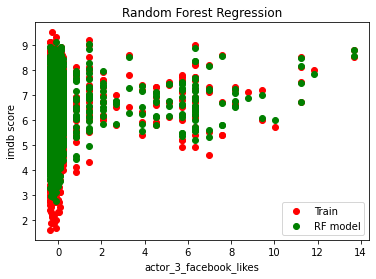

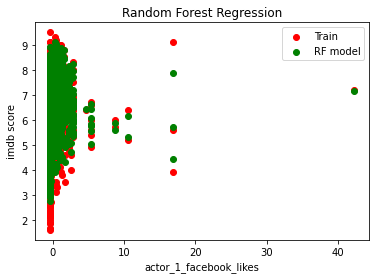

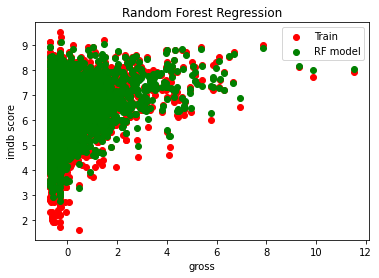

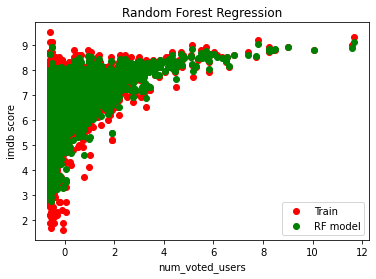

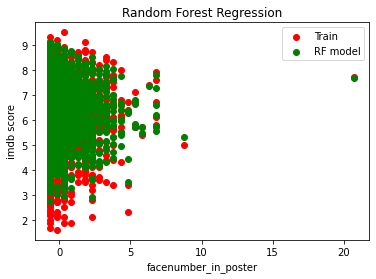

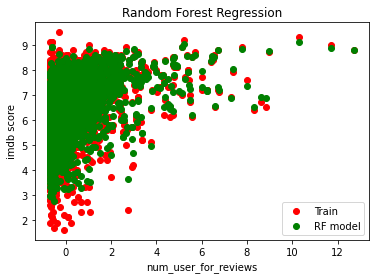

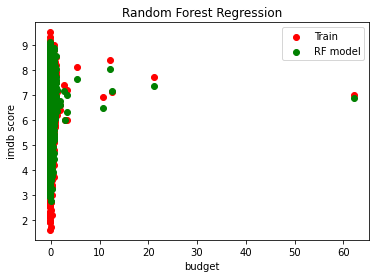

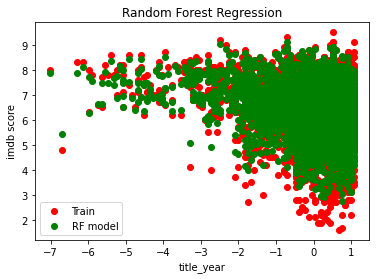

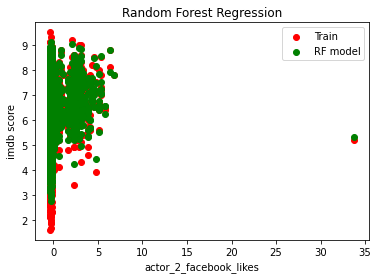

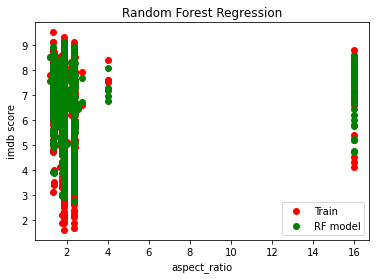

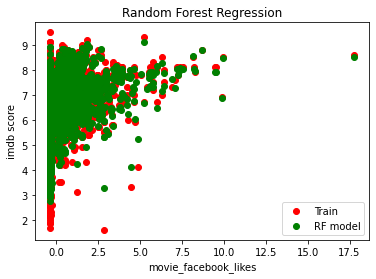

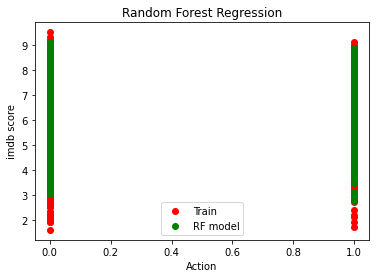

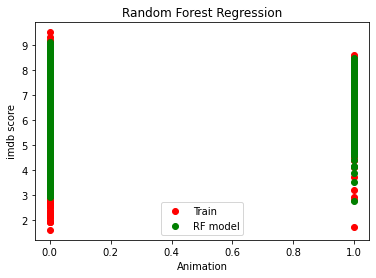

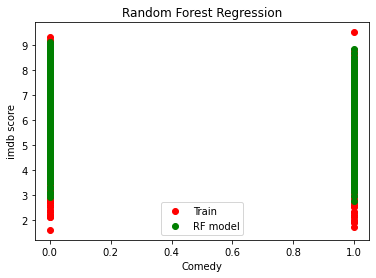

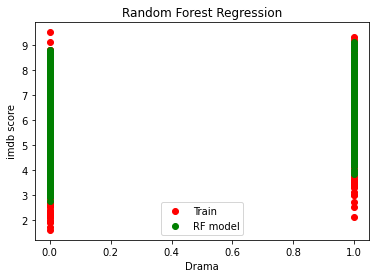

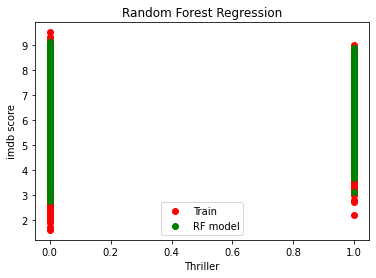

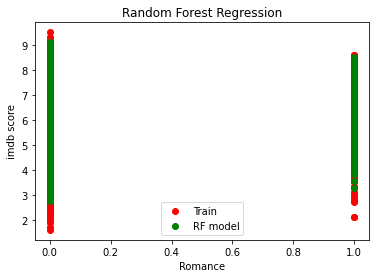

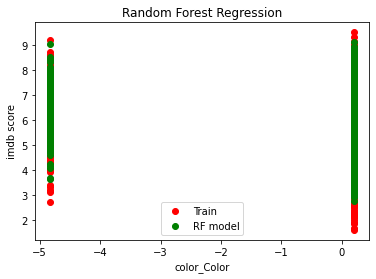

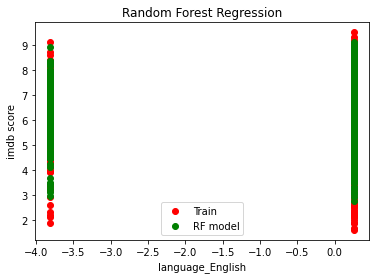

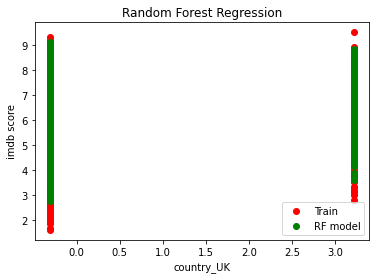

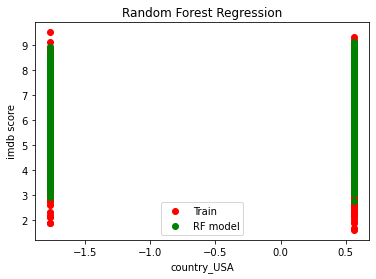

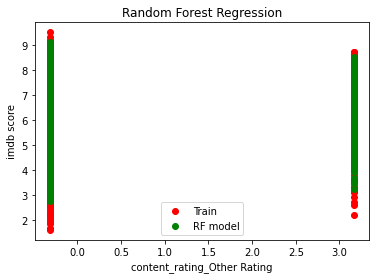

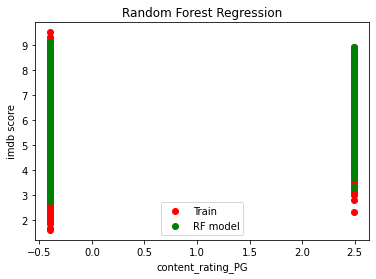

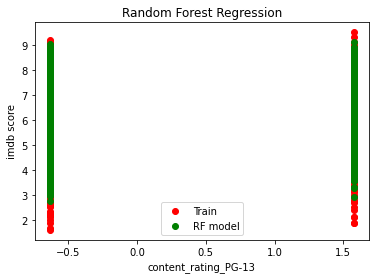

In [77]:
for col in X_train.columns:
    plt.scatter(X_train[col], y_train, color='red', label='Train')
    plt.scatter(X_train[col], regressor_rf.predict(X_train), color='green', label='RF model')
    plt.xlabel(col)
    plt.ylabel('imdb score')
    plt.title('Random Forest Regression')
    plt.legend()
    plt.show()